**Introduction:**


Durant ce projet, nous avons testé une nouvelle approche d'identification des tendances comportementales chez les gens âgées, nous nous sommes concentrés sur les données des capteurs thermiques. Nous voulions réaliser une visualisation des données. Pour cela nous avons créés des images pour chaque mesure des capteurs. En mettant bout à bout ces images nous avons réalisé des vidéos. Ensuite, nous avons créé une fonction qui va compter le nombre de passages des personnes dans les vidéos. Afin de visualiser ces résultats nous avons utilisé, pour chaque jour, des histogrammes décrivant le nombre de passage par heure.

**Encadré par:**

*   FLEURY Anthony


**Réalisé par:**


*   KASSEL Mohammed Issam
*   LACROIX Maxime
*   TOUIL Zouheir











**Remerciements :**


Nous profitons de ce Colab pour exprimer nos vifs remerciements à M. Anthony FLEURY pour le grand intérêt qui porte à ses élèves
, pour nous avoir présenter cette opportunité de
travailler sur ce projet et d’appliquer en pratique ce que nous
avons appris. Grâce à ce projet nous avons pu élargir nos
connaissances dans le domaine de l'analyse de données et de travailler sur un problème de porté réelle.,Malgré les difficultés
rencontrées, ce projet reste pour nous l’un des
meilleurs projets académiques qu’on a eu
l’honneur de mener. En effet, ce dernier nous a
permis de travailler en groupe, de collaborer
ensemble et  de développer nos connaissances techniques et
théoriques.


**Connexion au google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Les bibliothèques Utilisées**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import cv2
import os
from os.path import isfile, join
import seaborn as sns
from google.colab.patches import cv2_imshow
import datetime
import time
import datetime
import glob

**Regrouper tous les fichiers ".txt" dans un seul fichier ".csv"**

In [ ]:
#La fonction glob retourne les chemins de tous les fichiers qui se termines avec   .txt
all_files = glob.glob(path + "/*.txt")
#La boucle sera sur tous les fichiers dans all_files  

#Transformer tous les fichiers .txt au fichiers .csv

for f in all_files:
    dataframe1 = pd.read_csv(f,delimiter = ' ')
    dataframe1.to_csv(f +'.csv',  index = None)

#Fusionner des fichiers csv pour avoir un seul fichier 
df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

#Exportation du fichier csv

df.to_csv('Mac1_DATA_P1',index = None)


**Regrouper les fichiers selon les jours:**

In [ ]:
#1ere Etape : Ouvrire le fichier CSV 
df = pd.read_csv('Mac1_DATA_P1.csv',header = None)

#2eme Etape : Avoir la colone de date
rows = df[0].unique()

 #3eme Etape : Exporter des fichiers CSV selon les jours

for row in rows:
    day =  df[df[0] == row]
    day.to_csv('jour-' + row +'.csv',  index = None)
    


**Regrouper les fichiers par quatre heures:**

In [ ]:
path = '/Users/maximelacroix/Desktop/DataOtherMonth/3669959/'

all_files = glob.glob(path +'/*.csv') #liste les fichiers de données de chaque jours 

def select_3H(heure):  
    L = []
    for h in range(3):
        for m in range(60):
            for s in range(60):
                H=str(h+heure)
                M=str(m)
                S=str(s)
                L.append(H +':'+ M +':'+ S)
    return df[df[1].isin(L)]

# on crée ensuite les fichiers csv en utilisant la fonction et to_csv
for f in all_files: 
    f.replace('.csv','') #essai infructueux afin de changer le nom jour_XX.csv_0-3H.csv en jour_XX_0-3H.csv 
    select_3H(0).to_csv(f + '_0-3H.csv', index = None)
    select_3H(4).to_csv(f + '_4-7H.csv', index = None)
    select_3H(8).to_csv(f + '_8-11H.csv', index = None)
    select_3H(12).to_csv(f + '_12-15H.csv', index = None)
    select_3H(16).to_csv(f + '_16-19H.csv', index = None)
    select_3H(20).to_csv(f + '_20-23H.csv', index = None)
#les fichiers seront alors dans le même dossier que les csv des jours


**Traitement des données:**


In [ ]:
col = ['date', 'heure']
#col = ['x','date', 'heure']   Pour les données mac2
for k in range(1,33):
    col.append(str(k))
col+= ['*', 'NaN','hour']


**Lecture des données du premier jour entre 0 et 3h avec mac1. Le but est de créer une vidéo à partir des images générées avec des nuances de gris, associées aux températures enregistrées, afin de déterminer un seuil optimal qui permet la détection du passage d'un patient devant le capteur**

In [ ]:
path= "/content/drive/MyDrive/fewdays_mik_zt-master-DataOtherMonth-3669959/test/mac1/jour1/hour0.csv"
df = pd.read_csv(path)
df.columns= col
df

             date     heure     1     2     3  ...    31    32  *  NaN  hour
0      2019-06-05  00:00:00  12.6  13.1  13.4  ...  13.1  12.9  *  0.0     0
1      2019-06-05  00:00:00  12.6  13.1  13.4  ...  13.1  12.9  *  0.0     0
2      2019-06-05  00:00:00  12.5  13.0  13.4  ...  13.0  12.9  *  0.0     0
3      2019-06-05  00:00:00  12.5  13.0  13.4  ...  13.1  13.0  *  0.0     0
4      2019-06-05  00:00:00  12.7  13.2  13.5  ...  13.2  13.1  *  0.0     0
...           ...       ...   ...   ...   ...  ...   ...   ... ..  ...   ...
92003  2019-06-05  04:59:59  11.8  12.3  12.5  ...  12.8  12.7  *  0.0     4
92004  2019-06-05  04:59:59  11.8  12.3  12.5  ...  12.9  12.7  *  0.0     4
92005  2019-06-05  04:59:59  11.8  12.3  12.6  ...  12.9  12.8  *  0.0     4
92006  2019-06-05  04:59:59  11.8  12.3  12.6  ...  12.8  12.7  *  0.0     4
92007  2019-06-05  04:59:59  11.8  12.2  12.5  ...  12.8  12.6  *  0.0     4

[92008 rows x 37 columns]


In [ ]:
#fonction qui calcule les nuances de gris à partir des températures 
def f(x):
    return ((2550*x/97) - (27285/97))

In [ ]:
#création chaque image avec (date/ heure) pour 1 df(4h)

array = np.zeros([24, 320], dtype=np.uint8)
l=len(df)
for j in range(l):

  x = []
  y = []
  for k in range(1,33):
    x.append(pd.to_numeric(df[str(k)][j]))
  for i in range(len(x)):    
    y.append(int(f(x[i])))
  for k in range(32):
    array[:,k*10:(k+1)*10] = y[k] 
  x = []
  y = []
  fnt = ImageFont.load_default()
  img = Image.fromarray(array)
  d = ImageDraw.Draw(img)
  d.text((1,0), text= df['date'][j] + ' ' + df['heure'][j], font=fnt, fill=(255))
  print(img)
  img.save('/content/drive/MyDrive/fewdays_mik_zt-master-DataOtherMonth-3669959/test/mac1/images/testrgb_' + str(j) + '.png')

Exemple des images créées: https://drive.google.com/drive/folders/1if-jxrwy4Y2rFvAIgmMf7Swk59J5tqMW?usp=sharing

In [ ]:
#fonction pour créer la vidéo à partir des images 

def convert_to_video(pathIn, pathOut, fps):
    frame_array=[]
    files=[f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    for i in range(len(files)):
        filename=pathIn+files[i]
        img=cv2.imread(filename)
        print(img.shape)
        height = img.shape[0]
        width = img.shape[1]
        size=(width , height)
        
        #for k in range(time):
        frame_array.append(img)
    out = cv2.VideoWriter(pathOut, cv2.VideoWriter_fourcc(*'mp4v'), fps, size)
    for i in range(len(frame_array)):
        out.write(frame_array[i])
    out.release()
    

directory= '/content/drive/MyDrive/fewdays_mik_zt-master-DataOtherMonth-3669959/test/mac1'
pathIn=directory + '/images/'
pathOut=directory + '/videos/video_test.avi'
fps=10
time= 0.1

convert_to_video(pathIn, pathOut, fps)

Exemple d'une vidéo créée: https://drive.google.com/file/d/1Wc_rOay4D5d6BJ9nJ7QaTN7ImGU1krur/view?usp=sharing

In [ ]:
#fonction pour transformer les dates de "str" en "datetime"
def time_diff(start, end):
  start=datetime.datetime.strptime(start,'%H:%M:%S')
  end=datetime.datetime.strptime(end,'%H:%M:%S')
  return start,end

In [ ]:
#traitement des données mac1 pour un seul patient 

**Fonction d'optimisation qui permet de conserver les lignes ayant une température maximale supérieure à 17 pour mac1**

In [ ]:
def optim(dataf):
  min=17
  l =len(dataf)
  df_f1=pd.DataFrame(columns=col)
  for j in range(l):
    x =[]
    for k in range(2,34):
        x.append(dataf.iloc[j][k])
    max1=max(x)
    if max1>min :
      df_f1=df_f1.append(dataf.iloc[j])
  return df_f1



**Fonction qui calcule la différence de temps entre 2 enregistrements succéssifs**

In [ ]:
def time_diff(start, end):
  start=datetime.datetime.strptime(start,'%H:%M:%S')
  end=datetime.datetime.strptime(end,'%H:%M:%S')
  return end-start

**Fonction qui calcule le nombre de passage du patient, en se basant sur un temps minimal statique (5 secondes) pour mac1**



In [ ]:
tmin =5
def nombre_passage(df1):
  nt=0
  n=len(df1)
  for i in range(n-1):
    s=time_diff(df1.iloc[i][2],df1.iloc[i+1][2])
    if(s.seconds>tmin):
      nt+=1
  return nt



In [ ]:
#création d'un dataframe pour ajouter le nombre de passage associé à chaque intervalle
h=['0-3','4-7','8-11','12-15','16-19','20-23']
df_final=pd.DataFrame({'hours':h})
df_final

In [ ]:
directory= '/content/drive/MyDrive/fewdays_mik_zt-master-DataOtherMonth-3669959/test/mac1'

**Calcul du nombre de passage pour tous les intervalles du temps durant 1 jour**




In [ ]:
files=[f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort()
s=[]
for i in range(len(files)):
  df= pd.read_csv(directory +'/jour3/hour'+str(i)+'.csv')
  df= optim(df)
  np=nombre_passage(df)
  s.append(np)
df_final['jour3']=s
print(df_final)  


**On sauvegarde les données mac1 obtenues pour tous les jours dans**
**un fichier csv**



In [ ]:
df_final.to_csv('/content/drive/MyDrive/fewdays_mik_zt-master-DataOtherMonth-3669959/test/mac1/resultat.csv')

**Visualisation des résultats en histogrammes**

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(30, 3), sharey=True)
ax[0].bar(df_final['hours'], df_final['jour1'], label="jour1")
ax[0].set_title('03/06/2019_Lundi')
ax[0].set(xlabel='heures', ylabel='nombre de passage')
ax[1].bar(df_final['hours'], df_final['jour2'], label="jour2")
ax[1].set_title('04/06/2019_Mardi')
ax[1].set(xlabel='heures', ylabel='nombre de passage')

ax[2].bar(df_final['hours'], df_final['jour3'], label="jour3")
ax[2].set_title('05/06/2019_Mercredi')
ax[2].set(xlabel='heures', ylabel='nombre de passage')

ax[3].bar(df_final['hours'], df_final['jour4'], label="jour4")
ax[3].set_title('06/06/2019_Jeudi')
ax[3].set(xlabel='heures', ylabel='nombre de passage')

ax[4].bar(df_final['hours'], df_final['jour5'], label="jour5")
ax[4].set_title('07/06/2019_Vendredi')
ax[4].set(xlabel='heures', ylabel='nombre de passage')

ax[5].bar(df_final['hours'], df_final['jour6'], label="jour6")
ax[5].set_title('08/06/2019_Samedi')
ax[5].set(xlabel='heures', ylabel='nombre de passage')

fig.suptitle('Nombre de Passage par jour')
plt.show()

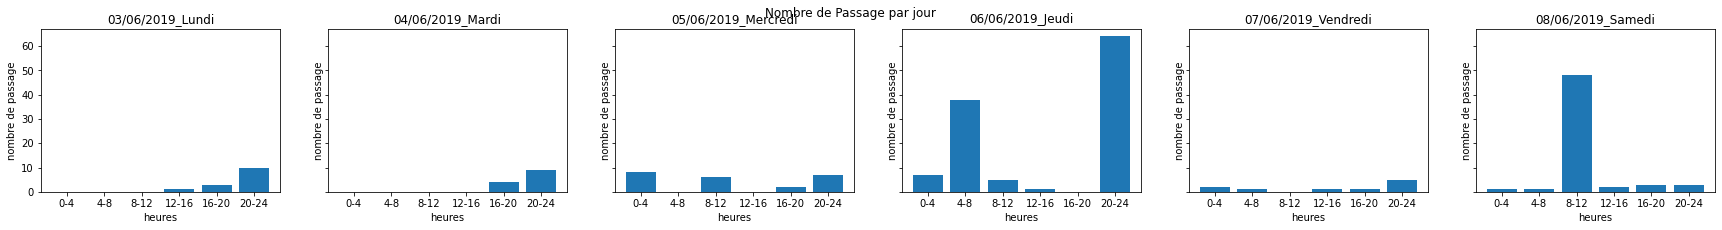

In [ ]:
#traitement des données mac2 pour un seul patient 

**On ajoute une colonne pour les données mac2**

In [ ]:
col = ['x','date', 'heure']
for k in range(1,33):
    col.append(str(k))
col+= ['*', 'NaN','hour']


In [ ]:
directory= '/content/drive/MyDrive/fewdays_mik_zt-master-DataOtherMonth-3669959/test/mac2'

In [ ]:
df= pd.read_csv(directory +'/jour1/hour'+str(2)+'.csv')


**Fonction d'optimisation qui permet de conserver les lignes ayant une température maximale supérieure à 17 pour mac2**

In [ ]:
def optim2(dataf):
  min=17
  l =len(dataf)
  df_f1=pd.DataFrame(columns=col)
  for j in range(l):
    x =[]
    for k in range(3,35):
        x.append(dataf.iloc[j][k])
    max1=max(x)
    if max1>min :
      df_f1=df_f1.append(dataf.iloc[j])
  return df_f1

**Fonction qui calcule le nombre de passage du patient, en se basant sur un temps minimal statique(5 secondes) pour mac2**

In [ ]:
tmin =5
def nombre_passage2(df1):
  nt=0
  n=len(df1)
  for i in range(n-1):
    s=time_diff(df1.iloc[i][4],df1.iloc[i+1][4])
    if(s.seconds>tmin):
      nt+=1
  return nt
#np=nombre_passage(df)
#np

In [ ]:
#création d'un dataframe pour ajouter le nombre de passage associé à chaque intervalle
h=['0-3','4-7','8-11','12-15','16-19','20-23']
df_final=pd.DataFrame({'hours':h})
df_final

,hours
0,0-4
1,4-8
2,8-12
3,12-16
4,16-20
5,20-24


**Calcul du nombre de passage pour tous les intervalles du temps durant 1 jour**

In [ ]:
files=[f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort()
s=[]
for i in range(len(files)):
  df= pd.read_csv(directory +'/jour3/hour'+str(i)+'.csv')
  df= optim2(df)
  np=nombre_passage2(df)
  s.append(np)
df_final['jour3']=s
print(df_final)

**On sauvegarde les données mac2 obtenues pour tous les jours dans**
**un fichier csv**

In [ ]:
df_final.to_csv('/content/drive/MyDrive/fewdays_mik_zt-master-DataOtherMonth-3669959/test/mac2/resultat2.csv')

**Visualisation des résultats en histogrammes**

In [ ]:
fig, ax = plt.subplots(1, 14, figsize=(60, 3), sharey=True)
ax[0].bar(df_final['hours'], df_final['jour1'], label="jour1")
ax[0].set_title('27/05/2019_Lundi')
ax[0].set(xlabel='heures', ylabel='nombre de passage')
ax[1].bar(df_final['hours'], df_final['jour2'], label="jour2")
ax[1].set_title('29/05/2019_Mercredi')
ax[1].set(xlabel='heures', ylabel='nombre de passage')

ax[2].bar(df_final['hours'], df_final['jour3'], label="jour3")
ax[2].set_title('30/05/2019_Jeudi')
ax[2].set(xlabel='heures', ylabel='nombre de passage')

ax[3].bar(df_final['hours'], df_final['jour4'], label="jour4")
ax[3].set_title('31/05/2019_Vendredi')
ax[3].set(xlabel='heures', ylabel='nombre de passage')

ax[4].bar(df_final['hours'], df_final['jour5'], label="jour5")
ax[4].set_title('01/06/2019_Samedi')
ax[4].set(xlabel='heures', ylabel='nombre de passage')

ax[5].bar(df_final['hours'], df_final['jour6'], label="jour6")
ax[5].set_title('02/06/2019_Dimanche')
ax[5].set(xlabel='heures', ylabel='nombre de passage')

ax[6].bar(df_final['hours'], df_final['jour7'], label="jour1")
ax[6].set_title('03/06/2019_Lundi')
ax[6].set(xlabel='heures', ylabel='nombre de passage')
ax[7].bar(df_final['hours'], df_final['jour8'], label="jour2")
ax[7].set_title('04/06/2019_Mardi')
ax[7].set(xlabel='heures', ylabel='nombre de passage')

ax[8].bar(df_final['hours'], df_final['jour9'], label="jour3")
ax[8].set_title('05/06/2019_Mercredi')
ax[8].set(xlabel='heures', ylabel='nombre de passage')

ax[9].bar(df_final['hours'], df_final['jour10'], label="jour4")
ax[9].set_title('06/06/2019_Jeudi')
ax[9].set(xlabel='heures', ylabel='nombre de passage')

ax[10].bar(df_final['hours'], df_final['jour11'], label="jour5")
ax[10].set_title('07/06/2019_Vendredi')
ax[10].set(xlabel='heures', ylabel='nombre de passage')

ax[11].bar(df_final['hours'], df_final['jour12'], label="jour6")
ax[11].set_title('08/06/2019_Samedi')
ax[11].set(xlabel='heures', ylabel='nombre de passage')

ax[12].bar(df_final['hours'], df_final['jour13'], label="jour5")
ax[12].set_title('10/06/2019_Lundi')
ax[12].set(xlabel='heures', ylabel='nombre de passage')

ax[13].bar(df_final['hours'], df_final['jour14'], label="jour6")
ax[13].set_title('11/06/2019_Mardi')
ax[13].set(xlabel='heures', ylabel='nombre de passage')
fig.suptitle('Nombre de Passage par jour')

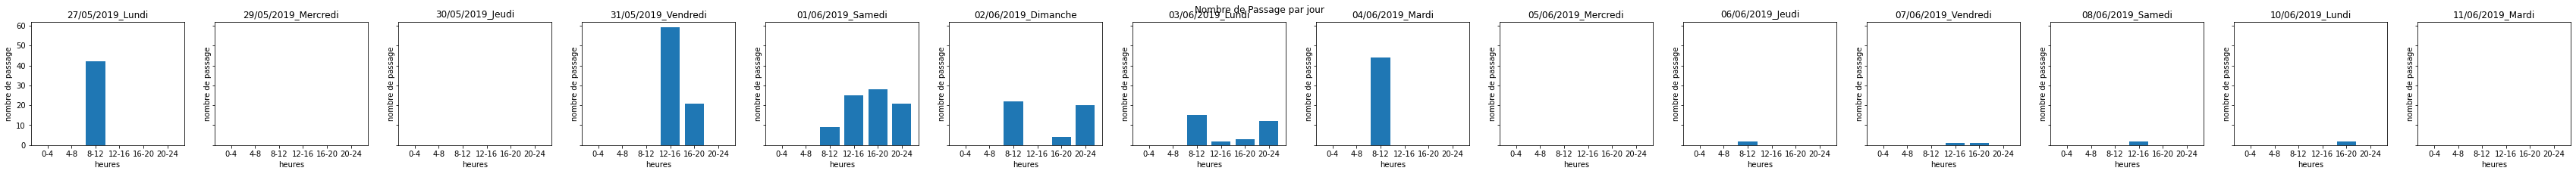

**Interprétaion des résultats :**

*   Au niveau du premier capteur on remarque qu’il a enregistré les températures pendant 6 jours contrairement au deuxième capteur qui était opérationnel pendant 14 jours.
*   On remarque qu'il y a une différence dans le nombre de passages calculés par les 2 capteurs dans les intervalles de temps du 03/06 jusqu'au 08/06, ce qui pourrait être expliqué par la présence des 2 capteurs dans différentes positions.
*   Absence des données, et remplacement des intervalles non enregistrés par 0 comme valeur par défaut, ce qui vient influencer les résultats obtenus.
*   Pour le capteur 1, souvent, le patient enregistre un nombre de passage élevé par jour, dans l'intervalle du temps entre 20 et minuit.
*   Pour le capteur 2, on obtient des jours avec un nombre de passage proche de 0, on remarque aussi une absence de mouvement pendant la nuit contrairement au capteur 1, ceci peut indiquer une anomalie dans le comportement du patient.



**Exploitation des résultats:**

*   A la fin de notre étude, nous sommes arrivés à calculer le nombre de passage du patient devant les deux capteurs. 
*   Avec ces résultats, nous pouvons calculer la durée moyenne de passage d'un individu devant le capteur, analyser le nombre de passage par jours, et créer des fonctions qui permettent d'identifier des anomalies de comportement du patient.

*   Pour la détection du passage du patient, nous avons défini un seuil statique. Ce qui en a résulté est un nombre de passage très élevé durant la journée. Ceci correspond aux changements de la température du milieu extérieur.
*   Pour résoudre ce problème, nous pouvons établir un seuil dynamique à partir duquel on peut considérer que l'on détecte une personne devant le capteur.


